In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aslttrain/test/test/N/N (51).png
/kaggle/input/aslttrain/test/test/N/N (46).png
/kaggle/input/aslttrain/test/test/N/N (22).png
/kaggle/input/aslttrain/test/test/N/N (6).png
/kaggle/input/aslttrain/test/test/N/N (20).png
/kaggle/input/aslttrain/test/test/N/N (39).png
/kaggle/input/aslttrain/test/test/N/N (31).png
/kaggle/input/aslttrain/test/test/N/N (15).png
/kaggle/input/aslttrain/test/test/N/N (35).png
/kaggle/input/aslttrain/test/test/N/N (42).png
/kaggle/input/aslttrain/test/test/N/N (26).png
/kaggle/input/aslttrain/test/test/N/N (48).png
/kaggle/input/aslttrain/test/test/N/N (9).png
/kaggle/input/aslttrain/test/test/N/N (28).png
/kaggle/input/aslttrain/test/test/N/N (3).png
/kaggle/input/aslttrain/test/test/N/N (5).png
/kaggle/input/aslttrain/test/test/N/N (8).png
/kaggle/input/aslttrain/test/test/N/N (53).png
/kaggle/input/aslttrain/test/test/N/N (49).png
/kaggle/input/aslttrain/test/test/N/N (19).png
/kaggle/input/aslttrain/test/test/N/N (37).png
/kaggle/input/aslt

IMPORTING LIBRARY

In [2]:
import tensorflow as tf
from keras.datasets import cifar10
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras import backend as k
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import cv2
import csv

PRE-PROCESSING

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

IMPORTING DATASET

In [8]:
training_set = train_datagen.flow_from_directory('/kaggle/input/aslttrain/train/train',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 6654 images belonging to 27 classes.


In [9]:
test_set = test_datagen.flow_from_directory('/kaggle/input/aslttrain/test/test',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 1481 images belonging to 27 classes.


BUILDING ML STRUCTURE

In [35]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))
classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax'))
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001)
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [36]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [37]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


TRAINING MODEL

In [38]:
history=classifier.fit(training_set,
                       epochs=8,
                  validation_data = test_set)

Epoch 1/8
666/666 [==============================] - 20s 27ms/step - loss: 1.9088 - accuracy: 0.3971 - val_loss: 0.5764 - val_accuracy: 0.7785
Epoch 2/8
666/666 [==============================] - 18s 27ms/step - loss: 0.8654 - accuracy: 0.7056 - val_loss: 0.2076 - val_accuracy: 0.9413
Epoch 3/8
666/666 [==============================] - 18s 27ms/step - loss: 0.6066 - accuracy: 0.7922 - val_loss: 0.1238 - val_accuracy: 0.9527
Epoch 4/8
666/666 [==============================] - 18s 27ms/step - loss: 0.4395 - accuracy: 0.8488 - val_loss: 0.1347 - val_accuracy: 0.9561
Epoch 5/8
666/666 [==============================] - 18s 27ms/step - loss: 0.3986 - accuracy: 0.8676 - val_loss: 0.0620 - val_accuracy: 0.9885
Epoch 6/8
666/666 [==============================] - 18s 27ms/step - loss: 0.3382 - accuracy: 0.8883 - val_loss: 0.0306 - val_accuracy: 0.9912
Epoch 7/8
666/666 [==============================] - 18s 27ms/step - loss: 0.2867 - accuracy: 0.9040 - val_loss: 0.0253 - val_accuracy: 0.9885

PLOTTING ACCURACY AND LOSS

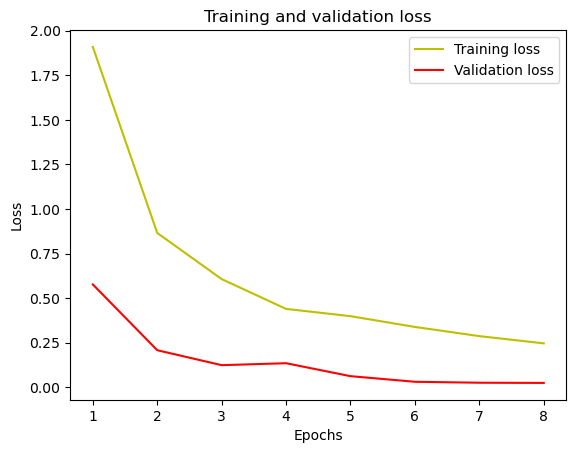

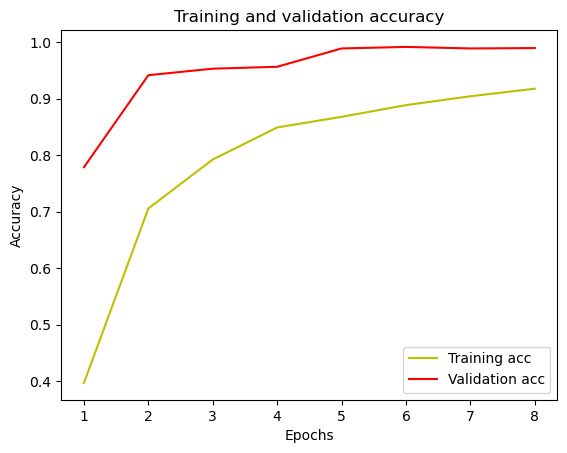

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

SAVE MODEL

In [40]:
model_json = classifier.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model_new.h5')
print('Weights saved')

Model Saved
Weights saved
